In [ ]:
! pip install textblob
! pip install vaderSentiment
! pip install scikit-learn
! pip install yfinance
! pip install nltk spacy
! pip install requests beautifulsoup4 pandas
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:

import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import time

import requests
from bs4 import BeautifulSoup
import csv
from textblob import TextBlob
import re
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import yfinance as yf
import os
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    lemmatizer = WordNetLemmatizer()
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in stemmed_tokens]

    return " ".join(lemmatized_tokens)


api_key = 'GxvFJaFLlG9NOdncyCQUQkXxaRe7nvA5'

sections_to_include = [
    "Corrections", "New York", "International Home", "U.S.", "Business Day",
    "Real Estate", "World", "Times Insider", "T Magazine",
    "Technology", "Magazine", "Your Money", "Obituaries"
]

articles_by_date = defaultdict(list)
for year in range(2012, 2024):

    for month in range(1, 13):
        url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
        print(url)
        response = requests.get(url)
        print(response)

        if response.status_code == 200:
            data = response.json()
            print(f"Status code: {response.status_code}")

            for article in data['response']['docs']:
                section_name = article['section_name']
                if section_name in sections_to_include:
                    date = article['pub_date'][:10]
                    headline = article['headline']['main']
                    articles_by_date[date].append(headline)

        else:
            print(f"Failed API. Status code: {response.status_code}")
        time.sleep(12)

with open(f'nyt_articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Headlines'])

    for date, headlines in articles_by_date.items():
        joined_headlines = " ".join(headlines)
        writer.writerow([date, preprocess_text(joined_headlines)])

https://api.nytimes.com/svc/archive/v1/2012/1.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/2.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/3.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/4.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/5.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/6.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/7.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2012/8.json?api-key=KPdZEAPGHoazqGaFckkGm1dNlCxULV85
<Response [200]>
Status co

In [ ]:
df1 = pd.read_csv('nyt_articles.csv')
df1.head()
df1.shape
df1

,Date,Headlines
0,2012-01-01,serviceman held carri explos texa airport expe...
1,2012-01-02,danger attack piraci onlin bulk bulkhead coast...
2,2012-01-03,democrat becom target occupi protest european ...
3,2012-01-04,decod iowa caucu coverag explain tonight poll ...
4,2012-01-05,bachmann next decis whether run reelect questi...
...,...,...
4378,2023-12-27,michael flynn rhode island hall fame inclus pr...
4379,2023-12-28,herbert kohl former wisconsin senat milwauke b...
4380,2023-12-29,main join colorado find trump inelig primari b...
4381,2023-12-30,trump team prepar file challeng ballot decis s...


In [ ]:
ticker_symbol = "AAPL"
start_date = "2024-01-01"
end_date = "2024-05-31"

sp500 = yf.Ticker(ticker_symbol)
sp500_data = sp500.history(period="max")
sp500_data.reset_index(inplace=True)
sp500_data['Date'] = sp500_data['Date'].dt.date

<Axes: xlabel='Date'>

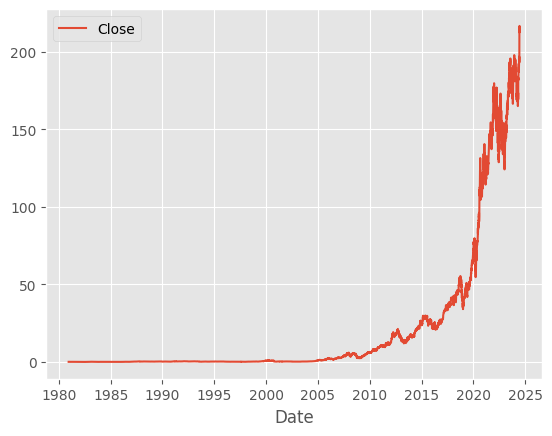

In [ ]:
sp500_stock=sp500_data
sp500_stock.plot.line(y="Close",x='Date',use_index=True)

In [ ]:
sp500_stock["Yesterday"] = sp500_stock["Close"].shift(1)
sp500_stock["Tomorrow"] = sp500_stock["Close"].shift(-1)
sp500_stock["Label(Up/Down)"] = (sp500_stock["Tomorrow"] > sp500_stock["Close"]).astype(int)


label_changes = sp500_stock["Label(Up/Down)"] != sp500_stock["Label(Up/Down)"].shift(1)
group_id = label_changes.cumsum()
sp500_stock["Cumu_Label(Up/Down)"] = sp500_stock.groupby(group_id).cumcount()
sp500_stock["Cumu_Label(Up/Down)"] = sp500_stock.apply(
    lambda row: row["Cumu_Label(Up/Down)"] if row["Label(Up/Down)"] == 1 else -row["Cumu_Label(Up/Down)"],
    axis=1
)
sp500_stock.dropna(inplace=True)

In [ ]:

sp500_stock.to_csv('sp500_stock.csv', index=False)
sp500_stock


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Yesterday,Tomorrow,Label(Up/Down),Cumu_Label(Up/Down)
1,1980-12-15,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0,0.099192,0.087117,0,-1
2,1980-12-16,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0,0.094017,0.089273,1,0
3,1980-12-17,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0,0.087117,0.091861,1,1
4,1980-12-18,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0,0.089273,0.097467,1,2
5,1980-12-19,0.097467,0.097898,0.097467,0.097467,48630400,0.0,0.0,0.091861,0.102211,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10964,2024-06-11,193.649994,207.160004,193.630005,207.149994,172373300,0.0,0.0,193.119995,213.070007,1,1
10965,2024-06-12,207.369995,220.199997,206.899994,213.070007,198134300,0.0,0.0,207.149994,214.240005,1,2
10966,2024-06-13,214.740005,216.750000,211.600006,214.240005,97862700,0.0,0.0,213.070007,212.490005,0,0
10967,2024-06-14,213.850006,215.169998,211.300003,212.490005,70122700,0.0,0.0,214.240005,216.669998,1,0


In [ ]:

df2 = pd.read_csv('sp500_stock.csv')
for window in [2,5,60,250,500]:
    df2[f'RollingMean_{window}'] = df2['Close'].rolling(window=window).mean()
    df2[f'RollingStd_{window}'] = df2['Close'].rolling(window=window).std()
    df2[f'Momentum_{window}'] = df2['Close'].diff(window)

df2 = df2.fillna(0)

In [ ]:

df_subset = df2.iloc[249:]

In [ ]:

merged_df = pd.merge(df1, df_subset, on='Date')

In [ ]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment


In [ ]:
merged_df['Subjectivity'] = merged_df['Headlines'].apply(getSubjectivity)
merged_df['Polarity'] = merged_df['Headlines'].apply(getPolarity)
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range(0, len(merged_df['Headlines'])):
    SIA = getSIA(merged_df['Headlines'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

merged_df['Compound'] = compound
merged_df['Negative'] = neg
merged_df['Neutral'] = neu
merged_df['Positive'] = pos

merged_df

,Date,Headlines,Open,High,Low,Close,Volume,Dividends,Stock Splits,Yesterday,...,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2012-01-03,democrat becom target occupi protest european ...,12.378494,12.472224,12.366399,12.433825,302220800,0.0,0.0,12.245458,...,2.335102,9.467322,1.840696,6.024462,0.443480,0.112125,-0.9790,0.129,0.775,0.095
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,0.0,0.0,12.433825,...,2.410088,9.479618,1.840383,6.147826,0.409932,0.119099,-0.9821,0.106,0.814,0.080
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,0.0,0.0,12.500648,...,2.476606,9.492336,1.840203,6.358870,0.440050,0.147485,-0.9783,0.133,0.767,0.100
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,0.0,0.0,12.639427,...,2.417348,9.505140,1.840702,6.402411,0.366081,0.113129,-0.9907,0.132,0.767,0.100
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,0.0,0.0,12.771560,...,2.421575,9.517979,1.840914,6.419035,0.344342,0.061082,-0.9901,0.122,0.797,0.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,2023-12-22,u prepar lift ban sale offens weapon saudi ara...,194.931260,195.160978,192.724085,193.353287,37122800,0.0,0.0,194.431885,...,62.393326,162.435817,17.730974,16.314606,0.346313,0.069688,-0.9738,0.145,0.736,0.118
3013,2023-12-26,u strike iranback group iraq attack base injur...,193.363270,193.642911,192.584265,192.803986,28919300,0.0,0.0,193.353287,...,63.661545,162.467170,17.770820,15.676392,0.294114,0.046984,-0.9741,0.173,0.764,0.063
3014,2023-12-27,michael flynn rhode island hall fame inclus pr...,192.244692,193.253399,190.846467,192.903839,48087700,0.0,0.0,192.803986,...,67.724167,162.501053,17.812704,16.941437,0.405104,-0.012241,-0.9971,0.236,0.693,0.072
3015,2023-12-28,herbert kohl former wisconsin senat milwauke b...,193.892582,194.411923,192.923817,193.333298,34049900,0.0,0.0,192.903839,...,64.607986,162.537038,17.856815,17.992966,0.315618,0.021329,-0.9952,0.198,0.748,0.054


In [ ]:
merged_df.columns

Index(['Date', 'Headlines', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits', 'Yesterday', 'Tomorrow', 'Label(Up/Down)',
       'Cumu_Label(Up/Down)', 'RollingMean_2', 'RollingStd_2', 'Momentum_2',
       'RollingMean_5', 'RollingStd_5', 'Momentum_5', 'RollingMean_60',
       'RollingStd_60', 'Momentum_60', 'RollingMean_250', 'RollingStd_250',
       'Momentum_250', 'RollingMean_500', 'RollingStd_500', 'Momentum_500',
       'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral',
       'Positive'],
      dtype='object')

In [ ]:
merged_df.to_csv('final_dataset.csv', index=False)